# Assignment A2

**Computational Geometry**

Group comgeo10 

1. Sudiksha Sharma
2. Shankar Anbalagan

In [111]:
# Libraries
import numpy as np

# Your libraries here
from plyfile import PlyData

## Load PLY file

In [113]:
# Your code here

filename = "datasets/skyscrapers_1.ply"

plyData = PlyData.read(filename)

vertexData = plyData["vertex"].data

## Compute the skylines (Line Sweep Algorithm)

In [114]:
# Your code here1
import matplotlib.pyplot as plt


# Sort vertex data in order of increasing x-axis 
vertexData.sort()

# Declaring priority queue (Containing points currently active under sweep line)
queue = []

# Declaring queue containing line segments
lines = []

# List of all points (ignoring the base points, i.e. points at 0 y-coordinate)
points = []
for x in vertexData:
    if x[1] != 0:
        points.append(x)

# Check if current point is some end point of a line segment
def check_if_end_point(list,lines,ycoord):
    for element in list:
        if element[1] == ycoord:
            list.remove(element)
            if not list or list[len(list)-1][1] < element[1]:
                lines.append(((x[0],x[1]),element))
            return True
    return False

# Insert point in sorted manner
def add_in_sorted_list(list,el):
    if list[len(list)-1][1] < el[1]:
        list.append(el)
    else:
        list.insert(0,el)

        
        
##### The Algorithm

# Iterate over the points
for x in points:
    
    # If priority queue is empty, insert the point in it and add line segment to the lines list
    if not queue:
        queue.append(x)
        lines.append(((x[0],x[1]),(x[0],0)))
    else:
        # Check if new point is end point of some line segment
        if check_if_end_point(queue,lines,x[1]):
            if not queue:
                # If priority queue is  not empty
                lines.append(((x[0],x[1]),(x[0],0)))
            else:
                # If new point is above than the greatest(y-coordinate) point in queue
                if x[1] > queue[len(queue)-1][1]:
                    lines.append(((x[0],x[1]),(x[0],queue[len(queue)-1][1])))
                    # Updating the previous point as per  the intersection detected
                    queue[len(queue)-1][0] = x[0]
        else:
            if x[1] > queue[len(queue)-1][1]:
                lines.append(((x[0],x[1]),(x[0],queue[len(queue)-1][1])))
                lines.append((queue[len(queue)-1],(x[0],queue[len(queue)-1][1])))
            add_in_sorted_list(queue,x)

## Visualize the skylines

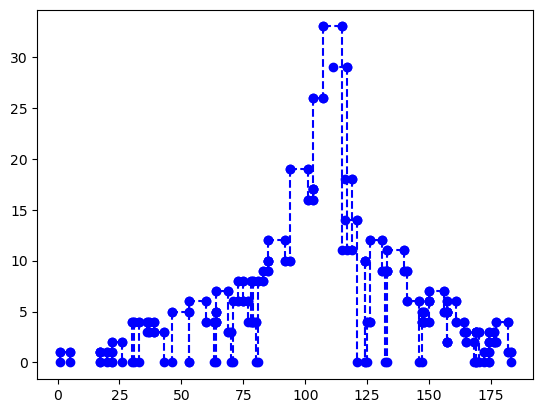

In [115]:
# Your code here
import matplotlib.pyplot as plt

for line in lines:
    x_values = [line[0][0], line[1][0]]
    y_values = [line[0][1], line[1][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.show()
